<a href="https://colab.research.google.com/github/pramanand-coder/Machine-Learning/blob/main/digital_add.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
downloaded=files.upload()

Saving DigitalAd_dataset.csv to DigitalAd_dataset.csv


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data=pd.read_csv("DigitalAd_dataset.csv")

In [ ]:
data.head(

,Age,Salary,Status
0,18,82000,0
1,29,80000,0
2,47,25000,1
3,45,26000,1
4,46,28000,1


In [ ]:
data.shape

(400, 3)

In [ ]:
data.dtypes

Age       int64
Salary    int64
Status    int64
dtype: object

In [ ]:
data.isnull().sum()

Age       0
Salary    0
Status    0
dtype: int64

In [ ]:
data["Status"].value_counts()

0    257
1    143
Name: Status, dtype: int64

In [ ]:
X=data.iloc[:,:-1]
print(X)

     Age  Salary
0     18   82000
1     29   80000
2     47   25000
3     45   26000
4     46   28000
..   ...     ...
395   35   65000
396   26   80000
397   26   52000
398   20   86000
399   32   18000

[400 rows x 2 columns]


In [ ]:
Y=data.iloc[:,-1]
print(Y)

0      0
1      0
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: Status, Length: 400, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [ ]:
print("shape of training data:",x_train.shape)
print("shape of testing data:",x_test.shape)

shape of training data: (300, 2)
shape of testing data: (100, 2)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
print(x_train)
print(x_test)

[[ 0.97446763  0.56400811]
 [-1.52088611 -1.28151705]
 [ 0.30264162  0.03671521]
 [-0.36918439 -0.81281224]
 [ 0.49459191  1.20847722]
 [-0.1772341   0.82765456]
 [-0.27320924 -0.78351819]
 [ 0.39861676  0.24177356]
 [-0.27320924  0.00742116]
 [ 0.01471619 -0.60775389]
 [ 0.11069133  0.00742116]
 [-0.46515953  2.29235707]
 [ 0.39861676 -0.02187289]
 [-0.27320924 -1.28151705]
 [ 1.93421906 -1.39869325]
 [-0.27320924  2.23376897]
 [ 0.11069133  1.03271291]
 [-0.56113467  1.44282962]
 [ 0.97446763  1.85294632]
 [ 0.30264162  0.03671521]
 [-1.13698554 -1.04716465]
 [-0.08125895  0.27106761]
 [ 0.30264162 -0.54916579]
 [-0.27320924 -0.60775389]
 [ 0.87849248 -1.39869325]
 [ 0.78251734 -0.34410744]
 [-0.46515953 -1.252223  ]
 [ 0.20666648  0.12459736]
 [ 0.39861676  0.97412481]
 [-0.56113467  1.35494747]
 [-0.46515953 -0.05116694]
 [-0.56113467  2.32165112]
 [-0.75308496  0.27106761]
 [ 1.16641791 -0.78351819]
 [ 0.20666648  1.06200696]
 [ 0.20666648 -0.40269554]
 [ 0.30264162 -0.31481339]
 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
error=[]
for i in range(1,40):
  model=KNeighborsClassifier(n_neighbors=i)
  model.fit(x_train,y_train)
  pred_i=model.predict(x_test)
  error.append(np.mean(pred_i != y_test))

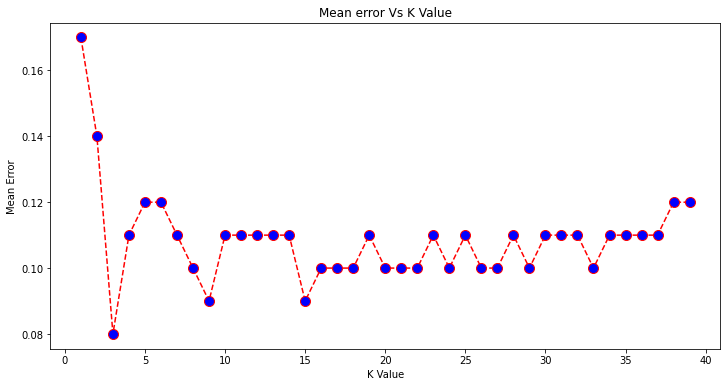

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(range(1,40),error,color="red",linestyle="dashed",markerfacecolor="blue",markersize=10,marker="o")
plt.title("Mean error Vs K Value")
plt.xlabel("K Value")
plt.ylabel("Mean Error")
plt.show()

In [ ]:
odel = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
print(y_pred)

[0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0
 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1]


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_pred,y_test)
cm

array([[57,  4],
       [ 4, 35]])

In [ ]:
print("Accuracy Score:",accuracy_score(y_pred,y_test)*100)

Accuracy Score: 92.0
